In [1]:
import os,sys,glob,numpy as np,pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
connectivity_data_dir = '../data/connectivity'

In [17]:
data_dir = '../data/sim_results'

## Figure 1

In [7]:
f = connectivity_data_dir + '/Lengths96.txt'
L = np.loadtxt(f)

In [8]:
f = connectivity_data_dir + '/Weights96.txt'
W = np.loadtxt(f)

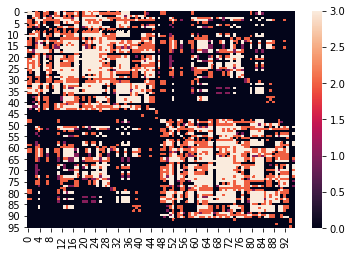

In [11]:
sns.heatmap(W)

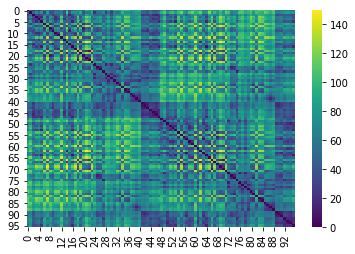

In [12]:
sns.heatmap(L,cmap='viridis')

Figure 1: Whole-brain anatomical connectivity used in the model. The network is composed of 96 nodes, each corresponding to brain regions from the regional map parcellation of Kötter & Wanke (2005)  (see Methods). Region labels are given on the left. A. Matrix of connectivity weights, representing the density of axonal connections between every pair of nodes (arbitrary units). Higher (brighter) values of the connection weights denote denser connections; black entries indicate no anatomical connection for that node pair.   B. Matrix of tract lengths, as approximated by Euclidean distances between the centroids of each area in the (human-modified) regional map parcellation. 

## Figure 3

Figure 3: Spontaneous transition to phase-locked synchrony due to adaptive plastic changes in conduction velocity. A. The network was initially set with uniform conduction velocity and phase were randomized. As a result, the overall dynamics are incoherent and the order parameter r is small. B. After a period of 10h, the conduction velocity along network connections changed and adjusted so that phase-locked synchrony emerges in the system. C. Evolution of randomly selected plastic conduction velocities. Conduction velocities increase and plateau once phase-locking is achieved.  D. Associated time delays as a function of time, showing how fast axonal connections formed over the duration of the simulations. Here g=0.3, ω_o=0.65rad/s = 10Hz, α_c=1x〖10〗^(-4). 

## Figure 4

Figure 4: Distribution of conduction velocities and delays after myelination. A. The distribution of conduction velocities as a function of tract lengths shows a negative correlation where longer connections are statistically slower. B. Conduction delays as a function of axonal tract lengths. The distribution has two main components: delays that are linearly related to tract length (i.e. constant conduction velocity) and those who result from myelination. This second contribution exhibits a high degeneracy in which multiple combination of lengths and velocities give rise to delays that are statistically similar. Here ω_o=0.25 rad/s=3Hz, ϵ=0.2 and g=1.0,  α_c=1.

## Figure 5

Figure 5: Order parameter as a function of the synaptic gain (g) of connections and frequency bands (δ,α ,β γ) for increasing the myelination rate (ϵ). In each case, the order parameter r was measured across independent trials, for increasing synaptic gain g and local oscillation frequency. As the myelination rate is increased from ϵ=0 to ϵ=0.2 (i.e. from the not plastic to the plastic case) the phase locking region increases. In absence of adaptive myelination, phase locking is achieved only for strong coupling and for low frequencies. When ϵ is increased, the synchronization regime becomes more prevalent, not only for higher coupling gains, but also across frequency bands and for weaker synaptic coupling A. ϵ=0.0; B. ϵ=0.1; C. ϵ=0.2. Here α_c=1. 

***Panel A***

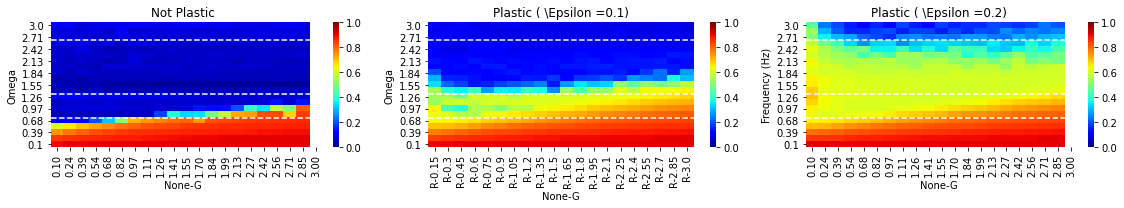

In [192]:
fig, ax = plt.subplots(ncols=3, figsize=(16,3))

N = df.index.values.shape[0]
I = 40./N
yticks = np.flipud(['%1.0f' %i for i in np.r_[0:40:I]])
#yticks


a = ax[0]
df = df_Fig5__Epsilon0p0__OPvsGandOMEGAvsOP0p0.set_index(['G', 'Omega']).unstack('G')
df = df.sort_index(0,ascending=False)
df = df.iloc[:,1:]
labs = ['%1.2f' %i for i in np.flipud(df.index.values)]
sns.heatmap(df, cmap='jet',xticklabels=labs,ax=a,vmin=0,vmax=1)
a.axhline(y=3.0, linestyle='--', c='white')
a.axhline(y=12, linestyle='--', c='white')
a.axhline(y=16, linestyle='--', c='white')
#a.axhline(y=0.8, linestyle='--', c='white')

a.set_title('Not Plastic')

a = ax[1]
df = df_Fig5__Epsilon0p1__OPvsGandOMEGAvsOP0p1.set_index(['G', 'Omega']).unstack('G')
df = df.sort_index(0,ascending=False)
df = df.iloc[:,1:]
#labs = ['%1.2f' %i for i in np.flipud(df.index.values)]
labs = ['%1.2f' %i for i in np.flipud(df.index.values)]

sns.heatmap(df, cmap='jet',ax=a,vmin=0,vmax=1)
#a.set_yticklabels(yticks,minor=False)#True)
a.axhline(y=3.0, linestyle='--', c='white')
a.axhline(y=12, linestyle='--', c='white')
a.axhline(y=16, linestyle='--', c='white')
a.set_title("Plastic ( \Epsilon =0.1)")#,usetex=True)



a = ax[2]
df = df_Fig5__Epsilon0p2__OPvsGandOMEGAvsOP0p2.set_index(['G', 'Omega']).unstack('G')
df = df.sort_index(0,ascending=False)
df = df.iloc[:,1:]
labs = ['%1.2f' %i for i in np.flipud(df.index.values)]

sns.heatmap(df, cmap='jet',xticklabels=labs,ax=a,vmin=0,vmax=1)
a.axhline(y=3.0, linestyle='--', c='white')
a.axhline(y=12, linestyle='--', c='white')
a.axhline(y=16, linestyle='--', c='white')
a.set_title("Plastic ( \Epsilon =0.2)")#,usetex=True)


a.set_ylabel('Frequency (Hz)')

plt.tight_layout()

***Panel B***

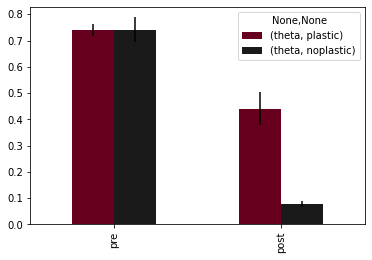

In [386]:
f = data_dir + '/Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledOrderParamaterPLI.txt'
df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledOrderParamaterPLI = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledOrderParamaterPLI.columns = ['t', 'theta']
df = df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledOrderParamaterPLI.copy()

df_plastic = df.set_index('t')
#df.iloc[0]
#df.loc[60*60*5]

f = data_dir + '/Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledOrderParamaterPLI.txt'
df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledOrderParamaterPLI = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledOrderParamaterPLI.columns = ['t', 'theta']
df = df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledOrderParamaterPLI.copy()

df_noplastic = df.set_index('t')
#df.iloc[0]
#df.loc[60*60*5]

_df = pd.concat({'plastic': df_plastic, 'noplastic': df_noplastic})



mn_pre = _df.unstack(0).loc[0:60*60*5].mean()
mn_post = _df.unstack(0).loc[60*60*5:(60*60*5)+(60*60*5)].mean()

std_pre = _df.unstack(0).loc[0:60*60*5].std()
std_post = _df.unstack(0).loc[60*60*5:(60*60*5)+(60*60*5)].std()

df_mn = pd.concat({'pre': mn_pre, 'post': mn_post})
df_std = pd.concat({'pre': std_pre, 'post': std_post})


df_mn.unstack(0).T.plot(kind='bar',yerr=df_std.unstack(0).T,cmap=cm.RdGy)

In [ ]:
pwd

***Panel C***

In [318]:
f = data_dir + '/Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledConductionSpeeds.txt'
df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledConductionSpeeds = pd.read_csv(f,sep='\t',header=None)
df = df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledConductionSpeeds#.columns = ['1', '2', '3', '4']
#df = df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledConductionSpeeds.set_index(['1', '2']).unstack('1')
#sns.heatmap(df)
#df = df.set_index(0,inplace=True)
df = df.set_index(0)
df

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
0.0,3,3,3,3,3,3,3,3,3,3.0
0.2,3,3,3,3,3,3,3,3,3,3.0
0.4,3,3,3,3,3,3,3,3,3,3.0
0.6,3,3,3,3,3,3,3,3,3,3.0
0.8,3,3,3,3,3,3,3,3,3,3.0
...,...,...,...,...,...,...,...,...,...,...
35999.0,0,0,0,0,0,0,0,0,0,NaN
35999.2,0,0,0,0,0,0,0,0,0,NaN
35999.4,0,0,0,0,0,0,0,0,0,0.0


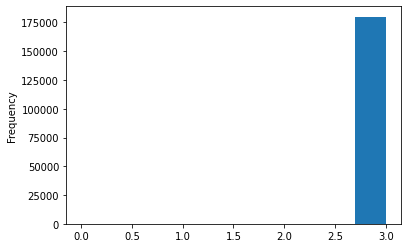

In [331]:
df[2].plot(kind='hist')

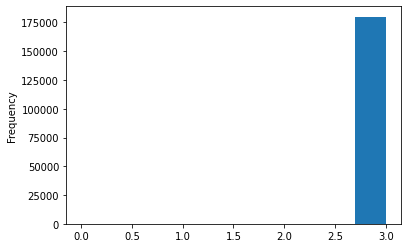

In [330]:
df[10].plot(kind='hist')

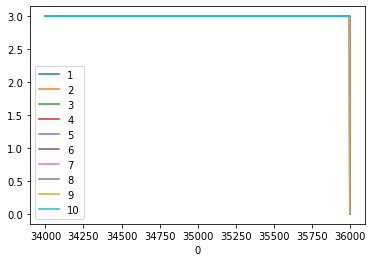

In [316]:
df.iloc[-10000:,:].plot()

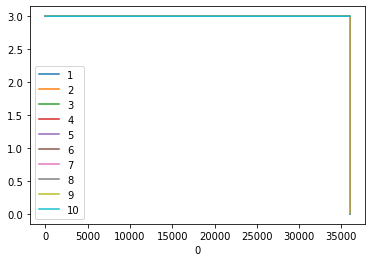

In [304]:
df.plot()

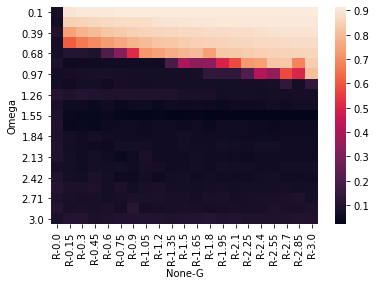

In [61]:
f = data_dir + '/Fig5__Epsilon0p0__OPvsGandOMEGAvsOP0p0.txt'
df_Fig5__Epsilon0p0__OPvsGandOMEGAvsOP0p0 = pd.read_csv(f,sep='\t',header=None)
df_Fig5__Epsilon0p0__OPvsGandOMEGAvsOP0p0.columns = ['G', 'Omega', 'R']
df = df_Fig5__Epsilon0p0__OPvsGandOMEGAvsOP0p0.set_index(['G', 'Omega']).unstack('G')
sns.heatmap(df)

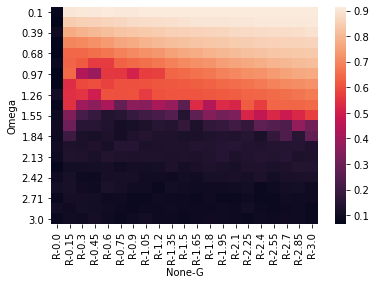

In [62]:
f = data_dir + '/Fig5__Epsilon0p1__OPvsGandOMEGAvsOP0p1.txt'
df_Fig5__Epsilon0p1__OPvsGandOMEGAvsOP0p1 = pd.read_csv(f,sep='\t',header=None)
df_Fig5__Epsilon0p1__OPvsGandOMEGAvsOP0p1.columns =   ['G', 'Omega', 'R']
df = df_Fig5__Epsilon0p1__OPvsGandOMEGAvsOP0p1.set_index(['G', 'Omega']).unstack('G')
sns.heatmap(df)

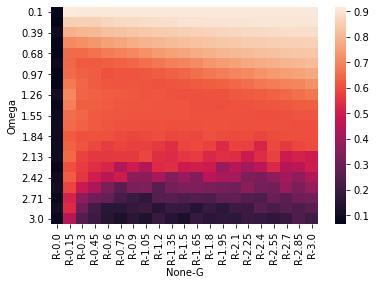

In [63]:
f = data_dir + '/Fig5__Epsilon0p2__OPvsGandOMEGAvsOP0p2.txt'
df_Fig5__Epsilon0p2__OPvsGandOMEGAvsOP0p2 = pd.read_csv(f,sep='\t',header=None)
df_Fig5__Epsilon0p2__OPvsGandOMEGAvsOP0p2.columns =    ['G', 'Omega', 'R']
df = df_Fig5__Epsilon0p2__OPvsGandOMEGAvsOP0p2.set_index(['G', 'Omega']).unstack('G')
sns.heatmap(df)

In [76]:
from numpy import pi

In [160]:
a.set_title?

In [167]:
from matplotlib import rc
rc('text', usetex=False)

In [175]:
import matplotlib

In [190]:
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=False#True

<ipython-input-190-204134e169f0>:2: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  matplotlib.rcParams['text.latex.unicode']=False#True


In [336]:
df

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
0.0,3.00271,3.00229,3.00089,3.00223,3.00002,3.00289,3.01251,3.00473,3.01205,3.0
0.2,3.00271,3.00229,3.00089,3.00223,3.00002,3.00289,3.01511,3.00473,3.01477,3.0
0.4,3.00271,3.00229,3.00089,3.00223,3.00008,3.00289,3.01828,3.00627,3.01838,3.0
0.6,3.00271,3.00229,3.00089,3.00223,3.00014,3.00289,3.02191,3.00851,3.02011,3.0
0.8,3.00271,3.00229,3.00183,3.00223,3.00015,3.00289,3.02368,3.00988,3.02170,3.0
...,...,...,...,...,...,...,...,...,...,...
35999.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
35999.2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
35999.4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0


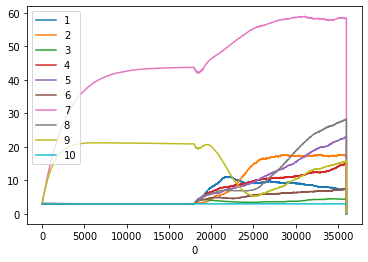

In [335]:
f = data_dir + '/Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionSpeeds.txt'
df = df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionSpeeds = pd.read_csv(f,sep='\t',header=None)
#df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionSpeeds#.columns = ['1', '2', '3']

#df = df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionSpeeds.set_index(['1', '2']).unstack('1')
#sns.heatmap(df)
df = df.set_index(0)
df.plot()

In [340]:
df.loc[0:60*60*10]#.iloc[:,:10].plot()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
0.0,3.00271,3.00229,3.00089,3.00223,3.00002,3.00289,3.01251,3.00473,3.01205,3.0
0.2,3.00271,3.00229,3.00089,3.00223,3.00002,3.00289,3.01511,3.00473,3.01477,3.0
0.4,3.00271,3.00229,3.00089,3.00223,3.00008,3.00289,3.01828,3.00627,3.01838,3.0
0.6,3.00271,3.00229,3.00089,3.00223,3.00014,3.00289,3.02191,3.00851,3.02011,3.0
0.8,3.00271,3.00229,3.00183,3.00223,3.00015,3.00289,3.02368,3.00988,3.02170,3.0
...,...,...,...,...,...,...,...,...,...,...
35999.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
35999.2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
35999.4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0


In [ ]:
f = data_dir + '/Fig7__Epsilon0p2_sr0p0__OPvsGandOMEGAvsOP0p2.txt'
df_Fig7__Epsilon0p_sr0p0__OPvsGandOMEGAvsOP0p2 = pd.read_csv(f,sep='\t',header=None)
df_Fig7__Epsilon0p2_sr0p0__OPvsGandOMEGAvsOP0p2.columns = ['Epsilon', 'Insult', 'R']

df = df_Fig7__Epsilon0p2_sr0p0__OPvsGandOMEGAvsOP0p2.set_index(['Epsilon', 'Insult']).unstack('Insult').T
df = df.sort_index(0,ascending=False)
df = df.iloc[:,1:]

sns.heatmap(df,cmap='jet')

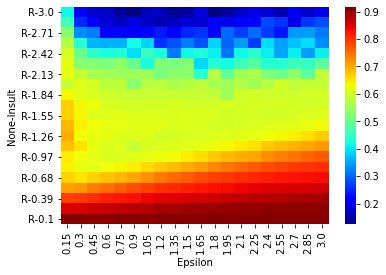

In [200]:
f = data_dir + '/Fig7__Epsilon0p2_sr0p0__OPvsGandOMEGAvsOP0p2.txt'
df_Fig7__Epsilon0p2_sr0p0__OPvsGandOMEGAvsOP0p2 = pd.read_csv(f,sep='\t',header=None)
df_Fig7__Epsilon0p2_sr0p0__OPvsGandOMEGAvsOP0p2.columns = ['Epsilon', 'Insult', 'R']

df = df_Fig7__Epsilon0p2_sr0p0__OPvsGandOMEGAvsOP0p2.set_index(['Epsilon', 'Insult']).unstack('Insult').T
df = df.sort_index(0,ascending=False)
df = df.iloc[:,1:]

sns.heatmap(df,cmap='jet')

In [ ]:
f = data_dir + '/Fig7__Epsilon0p2_sr1p0__OPvsGandOMEGAvsOP0p2.txt'
df_Fig7__Epsilon0p2_sr1p0__OPvsGandOMEGAvsOP0p2 = pd.read_csv(f,sep='\t',header=None)
df_Fig7__Epsilon0p2_sr1p0__OPvsGandOMEGAvsOP0p2.columns = ['Epsilon', 'Insult', 'R']

df = df_Fig7__Epsilon0p2_sr1p0__OPvsGandOMEGAvsOP0p2.set_index(['Epsilon', 'Insult']).unstack('Insult')
sns.heatmap(df)

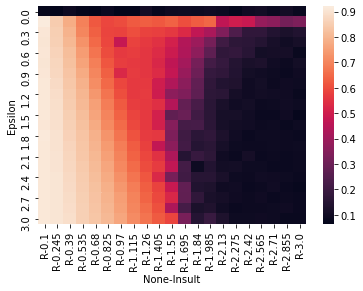

In [204]:
f = data_dir + '/Fig7__Epsilon0p2_sr0p5__OPvsGandOMEGAvsOP0p2.txt'
df_Fig7__Epsilon0p2_sr0p5__OPvsGandOMEGAvsOP0p2 = pd.read_csv(f,sep='\t',header=None)
df_Fig7__Epsilon0p2_sr0p5__OPvsGandOMEGAvsOP0p2.columns = ['Epsilon', 'Insult', 'R']

df = df_Fig7__Epsilon0p2_sr0p5__OPvsGandOMEGAvsOP0p2.set_index(['Epsilon', 'Insult']).unstack('Insult')
sns.heatmap(df)

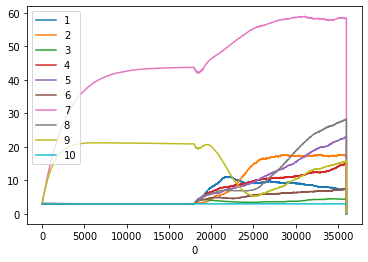

In [361]:
f = data_dir + '/Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionSpeeds.txt'
df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionSpeeds = pd.read_csv(f,sep='\t',header=None)
#df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionSpeeds#.columns = ['1', '2', '3']

df = df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionSpeeds.copy()#.set_index(['1', '2']).unstack('1')
#sns.heatmap(df)
df

#df.set_index(0).loc[0:60*60*5].plot()
df.set_index(0).plot()#loc[0:60*60*5].plot()


In [206]:
df

R                                                              \
Insult      0.100     0.245     0.390     0.535     0.680     0.825     0.970   
Epsilon                                                                         
0.00     0.076642  0.065815  0.093678  0.072627  0.067031  0.090771  0.064220   
0.15     0.920517  0.848800  0.782919  0.695461  0.621111  0.589393  0.601669   
0.30     0.907771  0.854107  0.794416  0.706321  0.635139  0.586929  0.583982   
0.45     0.906419  0.858785  0.805241  0.729462  0.649940  0.591458  0.479316   
0.60     0.908456  0.866116  0.817063  0.748773  0.671574  0.602478  0.568955   
0.75     0.904398  0.872691  0.825045  0.762286  0.690674  0.617673  0.574870   
0.90     0.910193  0.876877  0.832235  0.779799  0.703822  0.634788  0.531326   
1.05     0.910681  0.882316  0.837741  0.791230  0.718775  0.651853  0.590641   
1.20     0.911187  0.887412  0.845428  0.801066  0.739412  0.670893  0.606046   
1.35     0.912079  0.891193  0.850160  0.809120  0.753385  0.688754  0.623973   
1.50     0.910790  0.894636  0.854110  0.818859  0.764868  0.701032  0.637509   
1.65     0.909634  0.896357  0.857824  0.824735  0.779280  0.712751  0.654536   
1.80     0.914147  0.899246  0.860576  0.830312  0.790315  0.731837  0.670965   
1.95     0.912046  0.900261  0.867201  0.834565  0.798969  0.746226  0.688167   
2.10     0.911028  0.901510  0.872430  0.838971  0.805281  0.756177  0.698755   
2.25     0.912669  0.902850  0.876169  0.845184  0.813291  0.766911  0.708528   
2.40     0.911656  0.904166  0.878107  0.849521  0.819020  0.779176  0.724127   
2.55     0.912422  0.904688  0.881036  0.852029  0.824180  0.789322  0.738827   
2.70     0.912817  0.905567  0.884898  0.855072  0.828167  0.796056  0.750249   
2.85     0.912713  0.906234  0.887555  0.857121  0.832979  0.802294  0.758891   
3.00     0.912941  0.906802  0.890516  0.859724  0.835901  0.807655  0.769209   

                                       ...                                \
Insult      1.115     1.260     1.405  ...     1.695     1.840     1.985   
Epsilon                                ...                                 
0.00     0.065077  0.105861  0.077623  ...  0.096637  0.092218  0.100809   
0.15     0.624554  0.630981  0.620167  ...  0.602801  0.626289  0.645791   
0.30     0.602842  0.584410  0.577807  ...  0.532579  0.469799  0.423517   
0.45     0.582794  0.568344  0.551793  ...  0.440281  0.396585  0.319237   
0.60     0.575047  0.562449  0.539173  ...  0.434787  0.369471  0.273570   
0.75     0.567922  0.560049  0.526635  ...  0.412998  0.321644  0.215896   
0.90     0.569461  0.559960  0.536698  ...  0.390108  0.304857  0.187175   
1.05     0.569064  0.569116  0.499538  ...  0.363912  0.280810  0.172953   
1.20     0.569201  0.569893  0.498218  ...  0.340564  0.272237  0.165275   
1.35     0.574713  0.566792  0.546473  ...  0.283721  0.227865  0.158279   
1.50     0.586073  0.567793  0.509562  ...  0.297196  0.210640  0.160252   
1.65     0.593288  0.567477  0.511065  ...  0.218408  0.222135  0.164333   
1.80     0.611490  0.571500  0.564509  ...  0.205136  0.162783  0.174139   
1.95     0.626595  0.580157  0.472933  ...  0.213959  0.148946  0.159169   
2.10     0.639190  0.589544  0.549842  ...  0.150814  0.188318  0.167173   
2.25     0.656105  0.600881  0.570753  ...  0.216636  0.094835  0.141961   
2.40     0.672019  0.618095  0.530647  ...  0.209694  0.153680  0.151855   
2.55     0.687173  0.630334  0.585381  ...  0.278337  0.139187  0.132027   
2.70     0.696996  0.641840  0.595390  ...  0.275820  0.173940  0.123974   
2.85     0.705941  0.657441  0.608260  ...  0.221221  0.125145  0.135823   
3.00     0.716240  0.672283  0.623460  ...  0.325220  0.149591  0.194040   

                                                                               
Insult      2.130     2.275     2.420     2.565     2.710     2.855     3.000  
Epsilon                                                                        
0.00  

In [210]:
ls ../data/1

ls: cannot access ../data/1: No such file or directory


In [207]:
f = data_dir + '/Fig7__Epsilon0p0_sr0p0__OPvsGandOMEGAvsOP0p0.txt'
df_Fig7__Epsilon0p0_sr0p0__OPvsGandOMEGAvsOP0p0 = pd.read_csv(f,sep='\t',header=None)
df_Fig7__Epsilon0p0_sr0p0__OPvsGandOMEGAvsOP0p0.columns = ['Epsilon', 'Insult', 'R']

df = df_Fig7__Epsilon0p0_sr0p0__OPvsGandOMEGAvsOP0p0.set_index(['Epsilon', 'Insult']).unstack('Insult').T
#df = df.sort_index(0,ascending=False)
#df = df.iloc[:,1:]

#sns.heatmap(df,cmap='jet')

FileNotFoundError: [Errno 2] File ../data/sim_results/Fig7__Epsilon0p0_sr0p0__OPvsGandOMEGAvsOP0p0.txt does not exist: '../data/sim_results/Fig7__Epsilon0p0_sr0p0__OPvsGandOMEGAvsOP0p0.txt'

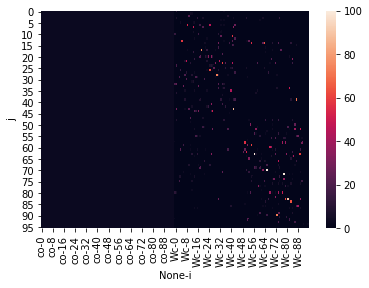

In [212]:
f = data_dir + '/Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.txt'
df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.columns = ['i', 'j', 'co','Wc'] 

df = df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.set_index(['i', 'j']).unstack('i')
sns.heatmap(df)

In [ ]:
df_

In [ ]:
f = data_dir + '/Fig6__Kuramoto_e0p0_a0p001_damage__ConductionSpeedMatrix.txt'
df_Fig6__Kuramoto_e0p0_a0p001_damage__ConductionSpeedMatrix = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p0_a0p001_damage__ConductionSpeedMatrix.columns = ['i', 'j', 'co','Wc'] 
df = df_Fig6__Kuramoto_e0p0_a0p001_damage__ConductionSpeedMatrix.copy()
df = df[['i', 'j', 'Wc']]
df = df.set_index(['i', 'j']).unstack('j')['Wc']
sns.heatmap(df)

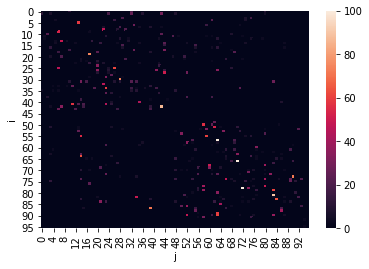

In [253]:
f = data_dir + '/Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.txt'
df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.columns = ['i', 'j', 'co','Wc'] 
df = df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.copy()
df = df[['i', 'j', 'Wc']]
df = df.set_index(['i', 'j']).unstack('j')['Wc']
sns.heatmap(df)

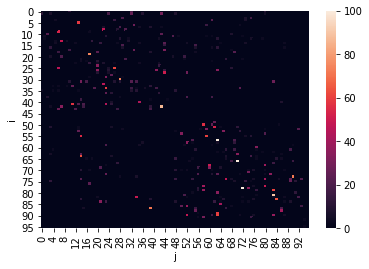

In [248]:
f = data_dir + '/Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.txt'
df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.columns = ['i', 'j', 'co','Wc'] 
df = df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.copy()
df = df[['i', 'j', 'Wc']]
df = df.set_index(['i', 'j']).unstack('j')['Wc']
sns.heatmap(df)

In [226]:
df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.set_index('co')

,i,j,Wc
co,,,
3,0,0,0.0
3,0,1,0.0
3,0,2,0.0
3,0,3,0.0
3,0,4,0.0
...,...,...,...
3,95,91,0.0
3,95,92,0.0
3,95,93,0.0


In [225]:
sns.heatmap(df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.set_index('co').loc[2].set_index(['i', 'j']).unstack('j'))

KeyError: 2

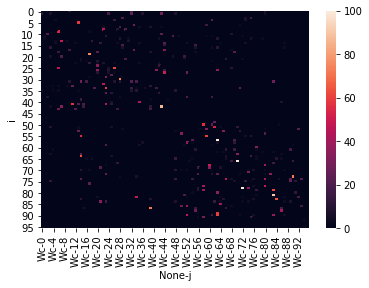

In [223]:
sns.heatmap(df_Fig6__Kuramoto_e0p2_a0p001_damage__ConductionSpeedMatrix.set_index('co').loc[3].set_index(['i', 'j']).unstack('j'))

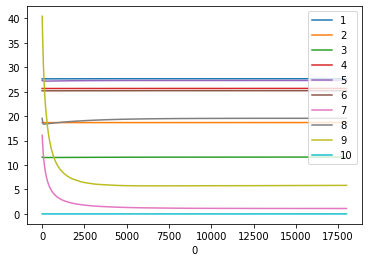

In [356]:

f = data_dir + '/Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionDelays.txt'
df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionDelays = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionDelays#.columns #= ['1', '2', '3', '4']

df = df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionDelays

df.set_index(0).loc[0:60*60*5].plot()

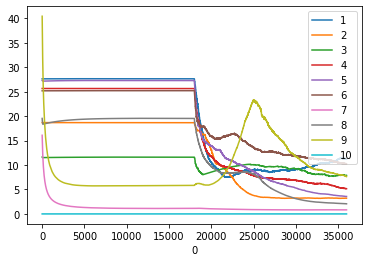

In [347]:

f = data_dir + '/Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionDelays.txt'
df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionDelays = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionDelays#.columns #= ['1', '2', '3', '4']

df = df_Fig6__Kuramoto_e0p2_a0p001_damage__SubSampledConductionDelays
df

df.set_index(0).plot()

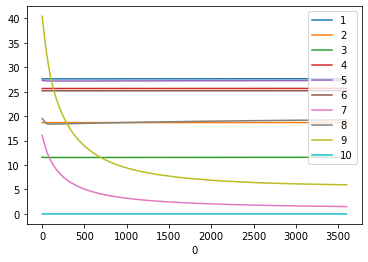

In [350]:
df.loc[0:60*60*5].set_index(0).plot()

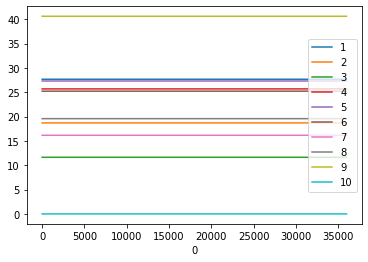

In [343]:
f = data_dir + '/Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledConductionDelays.txt'
df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledConductionDelays = pd.read_csv(f,sep='\t',header=None)
df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledConductionDelays#.columns #= ['1', '2', '3', '4']

df = df_Fig6__Kuramoto_e0p0_a0p001_damage__SubSampledConductionDelays
df

df.set_index(0).plot()